# Lecture 3 Part 2 - Non Linear Equations - In-Class Exercises


## Exercise 1 - Relaxation method

Solve the equations a) $x=2-e^{-x}$ and b) $x=e^{1-x^2}$. 

1. Write a short program that iterates equations a) and b).
2. Start iterating a) from $x=1.0$ and b) from $x=0.5$.
3. At every step, take the difference to the value at the previous step and plot this difference as a function of iteration number.


## Talking points

1. What do you observe?
2. How many iterations do you need for 1E-3 accuracy?
3. What is happening in case b)?


### Example Ferromagnetism

In the mean-field theory of ferromagnetism, the strength $M$ of magnetization of a ferromagnetic material like iron depends on temperature $T$ according to $$M=\mu \tanh{\frac{JM}{k_B T}},$$ where $\mu$ is the magnetic moment, $J$ is a coupling constant, and $k_B$ is Boltzmann's constant. To simplify things, let us make the substitutions $m=M/\mu$ and $C=\mu J/k_B$ so that $$m=\tanh{\frac{Cm}{T}}.$$ It is clear that this equation has the trivial solution $m=0$, which implies that a material that is not magnetized at all. But are there solutions with $m\ne 0$? Here is a program to find the solutions and to make a plot as a function of temperature for $C=1$: 

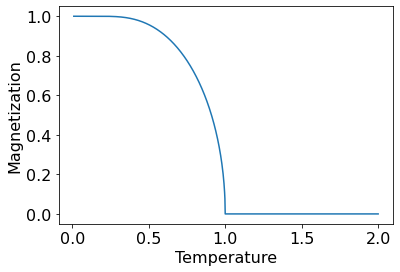

In [1]:
from math import tanh,cosh
from numpy import linspace
import matplotlib.pyplot as plt 

# Constants
Tmax = 2.0
points = 1000
accuracy = 1e-6

# Set up lists for plotting
y = []
temp = linspace(0.01,Tmax,points)

# Temperature loop
for T in temp:
    m1 = 1.0
    error = 1.0

    # Loop until error is small enough
    while error>accuracy:
        m1,m2 = tanh(m1/T),m1
        error = abs((m1-m2)/(1-T*cosh(m2/T)**2))
    y.append(m1)

# Make the graph
plt.rc('font',size=16) # set the font size
plt.plot(temp,y)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')

plt.show()


## Exercise 2 - Newton's method

1. We can now return to our earlier example of the root of the function  $f(x)=x - e^{1-x^2}$, for which the simple relaxation method failed. For the Newton method we need to add the derivative, which we have already derived earlier $f'(x)=1+2xe^{1-x^2}$. Modifying your relaxation method code to incorporate the expression for the Newton method.

Use Newton's method to calculate the inverse (or arc) hyperbolic tangent of a number $u$. By definition, $\tanh^{-1}{u}$ is the number $x$ such that $u=\tanh{(x)}$. To put that another way, $x$ is a root of the equation $\tanh{(x)}-u=0$. Recalling that the derivative of $\tanh{(x)}$ is $1/\cosh^2{(x)}$ the next Guess in Newton's method becomes $$x'=x-(\tanh{(x)}-u)\cosh^2{(x)}.$$ 

2. Write a function that calculates $\tanh^{-1}{(u)}$.
3. Plot $\tanh^{-1}{(u)}$ from -1 to 1.


## Talking points

1. What do you observe?
2. How quickly does Newton's method find the right solution?
3. Does your function $\tanh^{-1}{(u)}$ give the right solution?

## Exercise 3 - Golden ratio search

The Buckingham potential is an approximate representation of the potential energy between atoms in a solid or gas as a function of the distance $r$ between them: $$V(r)=V_0\left[\left(\frac{\sigma}{r}\right)^6-e^{-r/\sigma} \right] .$$ 

1. Plot the Buckingham potential for $\sigma$=1.
2. Complete the golden ratio example program below to find the minimum of the Buckingham potential.
3. Check your computational against the analytic solution.

## Talking points

1. What do you observe?
2. What can you say about the Buckingham potential?
3. How does the number of iterations depend on the specified accuracy?

Example program to be completed:

In [2]:
from math import exp,sqrt

# Constants
sigma = 1.0             # Value of sigma in nm
accuracy = 1e-6         # Required accuracy in nm
z = (1+sqrt(5))/2       # Golden ratio

# Function to calculate the Buckingham potential
def f(r):
    return (sigma/r)**6 - exp(-r/sigma)

# Initial positions of the four points
x1 = sigma/10
x4 = sigma*10
x2 = x4 - (x4-x1)/z
x3 = x1 + (x4-x1)/z

# Initial values of the function at the four points
f1 = f(x1)
f2 = f(x2)
f3 = f(x3)
f4 = f(x4)

# Main loop of the search process

# ADD THE GOLDEN RATIO SEARCH PROCEDURE HERE. YOU WILL NEED AN IF STATEMENT AND A STOPPING CONDITION.


# Print the result
print("The minimum falls at",0.5*(x1+x4),"nm")

## Exercise 4 - Gauss-Newton method and gradient descent

Return to the Buckingham potential from the previous exercise: $$V(r)=V_0\left[\left(\frac{\sigma}{r}\right)^6-e^{-r/\sigma} \right] .$$ Find the minimum of the Buckingham potential for $\sigma$=1:
1. For the Gauss-Newton method. Start from $r=\sigma$.
2. For gradient descent.
3. For gradient descent with numeric 1st derivative.

## Talking points

1. What do you observe?
2. What happens when you start from $r=4\sigma$ and why?
3. What is a good value for $\gamma$ in gradient descent?
